In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
user_behavior = pd.read_csv("data\\steam-200k.csv", header=None).drop(columns=4)
user_behavior.columns = ["user_id", "game_name", "behavior", "amount"]

# User Based (using just "play" behavior)

In [3]:
# get only user plays
user_plays = user_behavior[user_behavior["behavior"] == "play"].drop(columns="behavior")

In [4]:
# make sure each user only has one play amount for each game
user_plays = user_plays.groupby(["user_id", "game_name"]).sum().reset_index()

In [5]:
# only keep play times of at least 1 hour
user_plays = user_plays[user_plays['amount'] >= 1]

In [6]:
users_sorted = user_plays.groupby("user_id").count().reset_index().sort_values("amount", ascending=False)
games_sorted = user_plays.groupby("game_name").count().reset_index().sort_values("amount", ascending=False)

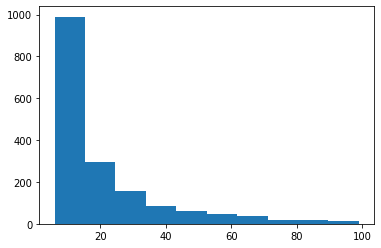

In [7]:
plt.hist(users_sorted['amount'][(users_sorted['amount'] > 5) & (users_sorted['amount'] < 100)])
plt.show()

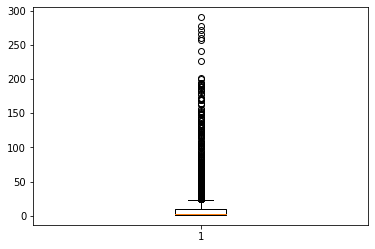

In [34]:
plt.boxplot(games_sorted['amount'][games_sorted['amount'] < 300])
plt.show()

In [9]:
print(user_plays.merge(users_sorted[users_sorted['amount'] >= 5]['user_id'], on='user_id').shape)
print(user_plays.shape)

(42915, 3)
(53694, 3)


In [10]:
games_sorted['amount'][(games_sorted['amount'] > 1000)]

781     3835
2561    1753
567     1324
Name: amount, dtype: int64

In [11]:
print(user_plays.merge(games_sorted[games_sorted['amount'] <= 1000]['game_name']).shape)
print(user_plays.shape)

(46782, 3)
(53694, 3)


In [12]:
games_sorted[(games_sorted['amount'] > 1000)]['game_name'].tolist()

['Dota 2', 'Team Fortress 2', 'Counter-Strike Global Offensive']

In [13]:
user_plays

,user_id,game_name,amount
0,5250,Alien Swarm,4.9
1,5250,Cities Skylines,144.0
2,5250,Deus Ex Human Revolution,62.0
4,5250,Portal 2,13.6
6,76767,Age of Empires II HD Edition,13.1
...,...,...,...
70468,309404240,Mitos.is The Game,2.2
70469,309404240,Team Fortress 2,2.2
70471,309404240,Unturned,13.0
70473,309554670,Mitos.is The Game,5.9


In [14]:
user_plays = user_plays.merge(user_plays.groupby('game_name').agg({'amount':'min'}).reset_index(), on='game_name')
user_plays = user_plays.merge(user_plays.groupby('game_name').agg({'amount_x':'max'}).reset_index(), on='game_name')

In [15]:
user_plays.columns = ['user_id', 'game_name', 'amount', 'min', 'max']
user_plays['norm_amount'] = (user_plays['amount'] - user_plays['min'].apply(np.floor)) / (user_plays['max'] - user_plays['min'].apply(np.floor)) 

In [16]:
user_plays.drop(columns=['min', 'max'])

,user_id,game_name,amount,norm_amount
0,5250,Alien Swarm,4.9,0.047561
1,298950,Alien Swarm,1.6,0.007317
2,975449,Alien Swarm,9.8,0.107317
3,1950243,Alien Swarm,3.8,0.034146
4,2259650,Alien Swarm,3.2,0.026829
...,...,...,...,...
53689,298431593,The Secret of Tremendous Corporation,1.3,1.000000
53690,298493475,Genesis Online,1.8,1.000000
53691,300199064,Paint the Town Red,2.1,1.000000
53692,306839937,Secret Files Tunguska,7.9,1.000000


In [29]:
user_plays[(user_plays['game_name'] == 'Alien Swarm') & (user_plays['amount'] > 83)].head(52)

,user_id,game_name,amount,min,max,norm_amount


In [44]:
X_train, X_test = train_test_split(user_plays, test_size=0.25)

In [45]:
X_test

,user_id,game_name,amount,min,max,norm_amount
46066,185258131,Spore,7.7,1.5,261.0,0.025769
15260,54826284,Age of Wonders Shadow Magic,16.0,1.3,791.0,0.018987
52585,277605352,Dota 2,346.0,346.0,346.0,NaN
12207,47384202,Star Wars Jedi Knight Jedi Academy,4.1,1.0,248.0,0.012551
28819,96556535,Rust,31.0,2.1,2154.0,0.013476
...,...,...,...,...,...,...
42468,161816812,The Elder Scrolls V Skyrim,77.0,1.0,543.0,0.140221
20879,69009454,The Bureau XCOM Declassified,6.9,1.0,180.0,0.032961
52856,285883244,Counter-Strike Global Offensive,194.0,3.3,194.0,1.000000
3201,12610800,Max Payne 3,10.4,1.0,329.0,0.028659


In [46]:
X_train

,user_id,game_name,amount,min,max,norm_amount
35844,126796140,Goat Simulator,3.3,1.6,18.8,0.129213
22262,73835640,"Cook, Serve, Delicious!",2.7,1.0,916.0,0.001858
23936,80363319,Reign Of Kings,34.0,1.6,160.0,0.207547
39798,148674157,The Binding of Isaac,15.7,1.3,72.0,0.207042
7654,32498610,Dota 2,1.7,1.7,500.0,0.001403
...,...,...,...,...,...,...
46869,191396022,Dota 2,2.7,2.7,2.7,1.000000
44536,173649791,OMSI 2,7.0,1.6,14.2,0.454545
11032,44010163,Grand Theft Auto III,15.2,1.8,57.0,0.253571
29982,101687527,APB Reloaded,60.0,1.1,618.0,0.095624


In [ ]:
plays.merge(plays.groupby('game_name').agg({'amount': 'min'}).reset_index(), on='game_name')